# What makes a movie successful?

## Ask 
### About (Business Task)

The biggest blockbusters in movie history have made millions of dollars worldwide. 

Let\'s define these concepts first:

- Box office hits (aka blockbusters): movies that make millions of dollars because many people go to watch them on theaters.
- Return on investment: The number of times the movie budget is recovered.

Let\'s analyze the data of the top 500 box office hits from 1939 to October 2023 to find out what makes a movie successful.

### Objective
Get to know the elements that successful movies have in common.

## Steps to complete this case study
* Ask: Understand the business task.
* Prepare: Get the data, check sources, license and content, organize it in a dataframe.
* Process: Choose tool, and document the process. Clean data, check for consistency, remove what we don't need.
* Analyze: By different categories. Create visualizations to see trends and understand data more clearly.
* Share: findings in presentation.
* Act: share recommendations and next steps.

## Prepare
### Sources

I first saw the dataset [here](https://informationisbeautiful.net/data), and then I got the data from the [stated source](https://www.boxofficemojo.com/chart/ww_top_lifetime_gross) and created another spreadsheet. The movie ratings and budgets were available at [IMDb](https://www.imdb.com/) and the ones that weren't available there, were found [here](https://www.the-numbers.com) and on [link](https://www.wikipedia.org).

The dataframe contains the movies' rank (position within the 500 box office hits), title, year released (from 1939 to 2023), decade released, domestic gross profit in dollars, domestic profit in percentage, foreign gross profit, foreign profit in terms of percentage, worldwide gross profit, budget in dollars, budget recovered in terms of percentage, number of times the budget was recovered, running time, and rating. 

It\'s made available by IMDb under the stated [license](https://www.imdb.com/conditions). No personally identifiable information is used.

I followed the next steps to ensure the data's integrity:


In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

# Import dataset and set index column
df= pd.read_csv("Top500MoviesProfit_Simple.csv")

## Take a look at the data
# Verify the data types of each column, and if there's null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    500 non-null    int64  
 1   title                   500 non-null    object 
 2   year                    500 non-null    int64  
 3   decade                  500 non-null    object 
 4   domestic_gross          500 non-null    object 
 5   domestic_prcnt          500 non-null    object 
 6   foreign_gross           500 non-null    object 
 7   foreign_prcnt           500 non-null    object 
 8   worldwide_gross         500 non-null    object 
 9   budget                  495 non-null    object 
 10  budget_recovered_prcnt  495 non-null    object 
 11  times_budget_recovered  495 non-null    float64
 12  running_time            500 non-null    object 
 13  rating                  500 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory

## Process
I’m using Python because I wanted to put my knowledge into practice and I confirmed that it can it can also create nice visualizations.

To clean the data, I started by cleaning the column names, then I divided the columns by data type and cleaned them accordingly. In this case, some number colums were entered as strings, so I typecasted them. After that, I checked the others for consistency. I concatenated two columns to solve a false-duplicates issue, then renamed, dropped other columns, and reordered them. 

In [2]:
# Start by cleaning the column names
# See if there's whitespaces in the column names
print(df.columns)

# When applicable, rename the columns to remove whitespaces:
df.columns = df.columns.str.replace(' ', '')

# Rename running_time column to duration
df = df.rename(columns = {"running_time": "duration"})

# Verify changes where made
print(df.columns)

# Get a glimpse of the dataset
df.head()

# Columns list that need cleaning
str_cols = ['title', 'decade', 'domestic_gross', 'domestic_prcnt', 'foreign_gross', 
            'foreign_prcnt', 'worldwide_gross', 'budget', 'budget_recovered_prcnt',
            'duration', 'rating']
# Columns that are numeric integers (but have string/object type)
num_cols = ['domestic_gross', 'foreign_gross', 'worldwide_gross', 'budget']
# Columns that are numeric percentages (but have string/object type)
prcnt_cols = ['domestic_prcnt', 'foreign_prcnt','budget_recovered_prcnt']

# Clean string columns and change data type when needed
def clean_cols(dfName, colsList, numCols, prcntCols, suffix):
    for colName in colsList:
        # Remove whitespaces
        dfName[colName] = dfName[colName].str.strip()
        # Do this for numeric integer columns
        if colName in numCols:
            # When applicable, remove commas to have a type-cast-able string
            dfName[colName] = dfName[colName].str.replace(',', '')
            # The budget columns' data is missing for 5 movies, fill them with zeroes for now
            dfName[colName] = dfName[colName].fillna(0)
            # Type cast to int64
            dfName[colName] = dfName[colName].astype('int64')
        # Do this for percentage columns
        elif colName in prcntCols:
            # Remove suffix from specified columns
            dfName[colName] = dfName[colName].str.rstrip(suffix)
            # Type cast strings to floating numbers
            dfName[colName] = dfName[colName].astype('float64')
            
clean_cols(df, str_cols, num_cols, prcnt_cols, "%")

## Check data consistency
# Verify if there's inconsistencies in the other columns
print("NUMBER OF UNIQUE MOVIES: ", df.title.nunique())
print("NUMBER OF MOVIES WITH DIFFERENT PROFIT: ", df.worldwide_gross.nunique())
print("RATING CATEGORIES: ", df.rating.unique())

# Check the length of the movies' decade column
decade_len = df.decade.str.len()

# See if all of them are the same length
if decade_len.nunique() == 1 :
    print("MOVIE DECADES ARE WRITTEN CONSISTENTLY.")
    # Now print the unique values
    print("MOVIE DECADES: ", df.decade.unique(), "\n")
else:
    print("THERE\'S INCONSISTENCIES IN THE DECADE COLUMN FORMAT.\n")
    
# From the dataframe's info previously gathered, there seems to be duplicate movies (500 titles, but 495 unique)
# Let's check for duplicate movies
print("NUMBER OF \'DUPLICATE\' MOVIES: ", df.duplicated(subset = 'title').sum())

# See if these duplicates were actually remakes:
# First, change year to string so we can concatenate
df['year'] = df['year'].astype('str')
# Make new column including title and year
df['title_year'] = df['title'] + " (" + df['year'] + ")"
# See if there's still duplicates (same movie and same year)
print("NUMBER OF DUPLICATE MOVIES: ", df.duplicated(subset = 'title_year').sum(), "\n")

# Change year column back to int type
df['year'] = df['year'].astype('int64')
# Change running time to timedelta type to compare later
df.duration = pd.to_timedelta(df.duration)

# Remove redundant data columns and other ones we're not using
df.drop(['title', 'year', 'budget_recovered_prcnt', 'domestic_gross', 'domestic_prcnt',
         'foreign_gross', 'foreign_prcnt'], axis=1, inplace=True)

# Place columns in desired position
new_pos = ['rank', 'title_year', 'decade', 'worldwide_gross', 'budget', 
           'times_budget_recovered', 'duration','rating']
df = df.reindex(columns = new_pos)

# Create a function to convert amounts to millions, so it's easier to see in plot
# Convert budget to millions
cols_to_mils = ['worldwide_gross', 'budget']

def to_millions(dfName, colsList):
    for colName in colsList:
        dfName[colName] = dfName[colName].div(1000000).round(1)
        dfName.rename(columns = {colName: colName + "_inM"}, inplace=True)

to_millions(df, cols_to_mils)

print(df.info())

# Delete unused variables
del str_cols, num_cols, prcnt_cols, clean_cols, decade_len, new_pos, cols_to_mils, to_millions

Index(['rank', 'title ', 'year', 'decade', 'domestic_gross', 'domestic_prcnt',
       'foreign_gross', 'foreign_prcnt ', 'worldwide_gross', 'budget',
       'budget_recovered_prcnt', 'times_budget_recovered', 'running_time',
       'rating'],
      dtype='object')
Index(['rank', 'title', 'year', 'decade', 'domestic_gross', 'domestic_prcnt',
       'foreign_gross', 'foreign_prcnt', 'worldwide_gross', 'budget',
       'budget_recovered_prcnt', 'times_budget_recovered', 'duration',
       'rating'],
      dtype='object')
NUMBER OF UNIQUE MOVIES:  495
NUMBER OF MOVIES WITH DIFFERENT PROFIT:  500
RATING CATEGORIES:  ['PG-13' 'PG' 'R' 'G' 'NR']
MOVIE DECADES ARE WRITTEN CONSISTENTLY.
MOVIE DECADES:  ["2000's" "2010's" "2020's" "1990's" "1980's" "1970's" "1930's"] 

NUMBER OF 'DUPLICATE' MOVIES:  5
NUMBER OF DUPLICATE MOVIES:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype          

## Analyze
### Start analysis by **Decade**
#### Do movies still make money in this decade?
First, let's see which decade is the most popular. Grouping the years by decades will show us the data in a more comprehensible way.

TOP MOVIE DECADES:
2010's    252
2000's    126
1990's     54
2020's     49
1980's     14
1970's      4
1930's      1
Name: decade, dtype: int64 



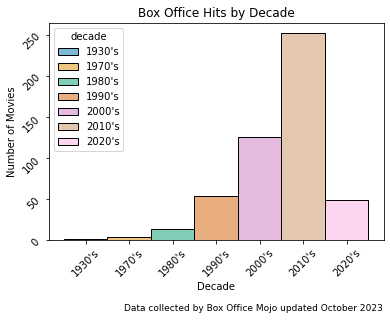

In [3]:
# Create caption for all plots
caption_txt = "Data collected by Box Office Mojo updated October 2023"

## BY DECADE ##
print("TOP MOVIE DECADES:")
print(df.decade.value_counts(), "\n")

# Set an order for categorical column decade, so the plots’ columns appear in the same order all the time
decade_order = ['1930\'s', '1970\'s', '1980\'s', '1990\'s', '2000\'s', '2010\'s', '2020\'s']
decade_ordered = CategoricalDtype(categories=decade_order, ordered=True)
df.decade = df.decade.astype(decade_ordered)

# Delete no longer used
del decade_order, decade_ordered

# Plot the number of blockbusters by decade
plt.title('Box Office Hits by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
sns.histplot(x=df.decade, hue=df.decade, palette='colorblind').axes.tick_params(labelrotation=45)
plt.figtext(0.3, -0.12, caption_txt, ha="left", fontsize=9)
plt.show()

### Continue analysis by **worldwide gross profit**

In [4]:
# Top movies with most money made in the box office globally
df2 = df.sort_values(by = 'worldwide_gross_inM', ascending = False)
df2.drop(['decade', 'budget_inM', 'times_budget_recovered', 'duration', 'rating'], axis=1, inplace=True)
df2.set_index('title_year', inplace=True)
print("MOVIES WITH MOST AND LEAST PROFIT FROM THIS LIST:")
df2

MOVIES WITH MOST AND LEAST PROFIT FROM THIS LIST:


,rank,worldwide_gross_inM
title_year,,
Avatar (2009),1,2923.7
Avengers: Endgame (2019),2,2799.4
Avatar: The Way of Water (2022),3,2320.3
Titanic (1997),4,2264.7
Star Wars: Episode VII - The Force Awakens (2015),5,2071.3
...,...,...
Inglourious Basterds (2009),496,321.5
101 Dalmatians (1996),497,320.7
The Conjuring (2013),498,320.4


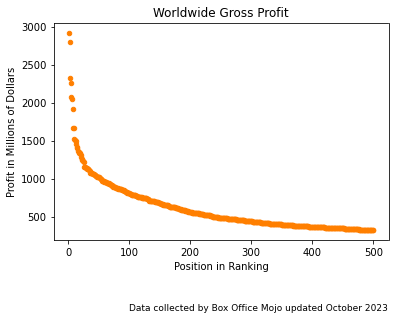

In [5]:
## BY WORLDWIDE PROFIT ##
# Plot the movies' box office gross profit worldwide and their position in the ranking
df2.plot(kind='scatter',x='rank', y = 'worldwide_gross_inM', color = '#ff7f00').set(
title = 'Worldwide Gross Profit', xlabel='Position in Ranking', ylabel = 'Profit in Millions of Dollars')
plt.figtext(0.3, -0.12, caption_txt, ha='left', fontsize=9)
plt.show()

del df2

### Then by **Budget**

#### Does budget relate to box office success?

In [6]:
# This dataframe has five null values within the budget related columns. 
# Let's see which rows have those nulls and manage them.
df.sort_values(by = 'budget_inM', ascending = True).head(5)

# The budget had a value of zero on these movies, so the times_budget_recovered column had nulls. 
# Those zeroed-budgets were missing values that were not available for the public, 
# therefore I eliminated the rows with nulls since working with zeroes would give wrong results.

,rank,title_year,decade,worldwide_gross_inM,budget_inM,times_budget_recovered,duration,rating
467,468,Never Say Die (2017),2010's,334.5,0.0,NaN,0 days 01:40:00,NR
401,402,Hello Mr. Billionaire (2018),2010's,367.0,0.0,NaN,0 days 01:58:00,NR
318,319,The Captain (2019),2010's,417.3,0.0,NaN,0 days 01:51:00,NR
315,316,"My People, My Homeland (2020)",2020's,422.4,0.0,NaN,0 days 02:33:00,NR
286,287,"My People, My Country (2019)",2010's,450.1,0.0,NaN,0 days 02:34:00,NR


The budget on the previously displayed rows was zero, but they were actually missing values that were not available for the public, therefore the times_budget_recovered column had nulls. 
Next, I eliminated those rows since working with zeroes would give wrong results.

In [7]:
# Create new dataframe for budget analysis and presentation
df3 = df.sort_values(by = 'budget_inM', ascending= False)
# Drop the rows with missing budget-related values
df3.dropna(axis = 0, subset= ['times_budget_recovered'], inplace = True)
# Drop columns unrelated to this analysis
df3.drop(['rank', 'decade', 'times_budget_recovered', 'duration', 'rating'], axis=1, inplace=True)
df3.set_index('title_year', inplace=True)

# Max, min, and average budget
print("MOVIE BUDGET IN MILLIONS OF DOLLARS:")
print(df3.budget_inM.describe().round(1), "\n")
# # median is the same as 50%
print("MOVIES WITH MOST AND LEAST BUDGET FROM THIS LIST:")
df3

MOVIE BUDGET IN MILLIONS OF DOLLARS:
count    495.0
mean     123.6
std       69.3
min        3.8
25%       75.0
50%      120.0
75%      170.0
max      460.0
Name: budget_inM, dtype: float64 

MOVIES WITH MOST AND LEAST BUDGET FROM THIS LIST:


,worldwide_gross_inM,budget_inM
title_year,,
Avatar: The Way of Water (2022),2320.3,460.0
Avengers: Endgame (2019),2799.4,356.0
Fast X (2023),704.7,340.0
Star Wars: Episode VIII - The Last Jedi (2017),1334.4,317.0
Indiana Jones and the Dial of Destiny (2023),382.9,300.0
...,...,...
Jaws (1975),476.5,7.0
Grease (1978),396.3,6.0
Your Name. (2016),382.2,5.1


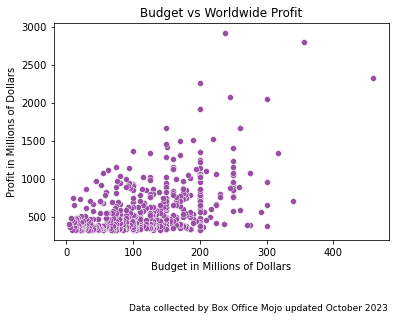

In [8]:
## BY BUDGET ##
# Plot the movies' box office gross profit worldwide and their budget
sns.scatterplot(x=df3.budget_inM, y = df3.worldwide_gross_inM, color = '#984ea3').set(
    title = 'Budget vs Worldwide Profit', xlabel='Budget in Millions of Dollars',
    ylabel = 'Profit in Millions of Dollars')
plt.figtext(0.3, -0.12, caption_txt, ha="left", fontsize=9)
plt.show()

del df3

### Get some insights by **times the budget was recovered**

For this section, I also worked without the null rows that were related to the budget.

In [9]:
# Top movies with most times the budget was recovered.
df4 = df.sort_values(by = 'times_budget_recovered', ascending = False)
# Drop the rows with missing budget-related values
df4.dropna(axis = 0, subset= ['times_budget_recovered'], inplace = True)
# Drop unrelated columns
df4.drop(['rank','decade', 'worldwide_gross_inM', 'duration', 'rating'], axis=1, inplace=True)
df4.set_index('title_year', inplace=True)

# # Max times budget recovered, min budget recovered, average budget recovered
# print("TIMES THE MOVIES\' BUDGET WAS RECOVERED:")
# print(df4.times_budget_recovered.describe().round(1))
print("MOVIES WITH MOST AND LEAST RETURN ON INVESTMENT FROM THIS LIST:")
df4

MOVIES WITH MOST AND LEAST RETURN ON INVESTMENT FROM THIS LIST:


,budget_inM,times_budget_recovered
title_year,,
Gone with the Wind (1939),3.8,104.5
Your Name. (2016),5.1,75.6
My Big Fat Greek Wedding (2002),5.0,73.7
E.T. the Extra-Terrestrial (1982),10.5,70.6
Jaws (1975),7.0,68.1
...,...,...
A Christmas Carol (2009),200.0,1.6
Robin Hood (2010),200.0,1.6
Superman Returns (2006),270.0,1.4


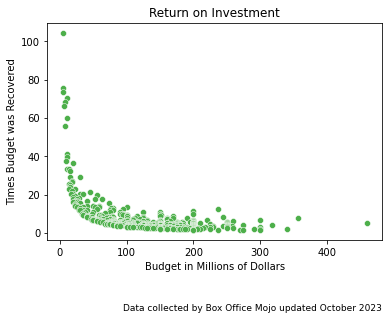

In [10]:
## BY RETURN ON INVESTMENT ##
# Plot the movies' budget and the number of times their budget was recovered
sns.scatterplot(x= df4.budget_inM, y = df4.times_budget_recovered, color = '#4daf4a').set(
title = 'Return on Investment', xlabel ='Budget in Millions of Dollars', ylabel = 'Times Budget was Recovered')
plt.figtext(0.3, -0.12, caption_txt, ha='left', fontsize=9)
plt.show()

del df4

### Check by **Duration**

In [11]:
## BY DURATION ##
print("MOVIE DURATION AVERAGE: ", df.duration.mean(), "\n" )

oneandhalf = (df['duration'] <= '0 days 01:30:00').sum()
oneandhalfplus = ((df['duration'] > '0 days 01:30:00') & (df['duration'] <= '0 days 02:00:00')).sum()
twoplus = ((df['duration'] > '0 days 02:00:00') & (df['duration'] < '0 days 03:00:00')).sum()
threeplus = (df['duration'] >= '0 days 03:00:00').sum()

data5 = {
    'duration':['<=1hr30min', '>1hr30min to 2hr', '>2hr to <3hr', '>=3hr'],
    'number_of_movies' : [oneandhalf,oneandhalfplus, twoplus, threeplus]
}
df5 = pd.DataFrame(data5)
del oneandhalf, oneandhalfplus, twoplus, threeplus, data5
df5

MOVIE DURATION AVERAGE:  0 days 02:02:38.040000 



,duration,number_of_movies
0,<=1hr30min,30
1,>1hr30min to 2hr,215
2,>2hr to <3hr,244
3,>=3hr,11


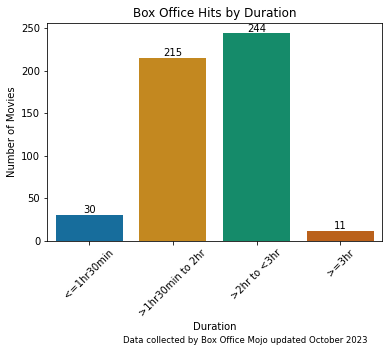

In [12]:
# Plot the number of blockbusters by duration
plot5= sns.barplot(x=df5.duration, y=df5.number_of_movies, palette = 'colorblind')
plot5.bar_label(plot5.containers[0])
plot5.set(title='Box Office Hits by Duration', xlabel='Duration', ylabel='Number of Movies')
plt.xticks(rotation=45)
plt.figtext(0.3, -0.23, caption_txt, ha='left', fontsize=8.5)
plt.show()

del df5, plot5

### Finally, by **Rating**

NUMBER OF TOP MOVIES BY RATING:
PG-13    253
PG       132
R         74
G         22
NR        19
Name: rating, dtype: int64


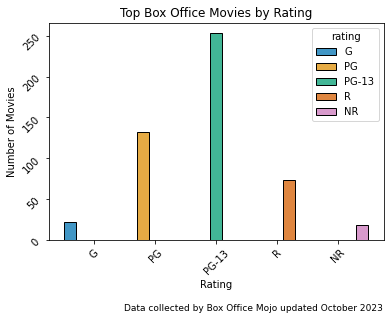

In [13]:
## BY RATING ##
print("NUMBER OF TOP MOVIES BY RATING:")
print(df.rating.value_counts())

# Create plot to see this more clearly
rating_order = ['G', 'PG', 'PG-13', 'R', 'NR']
rating_ordered = CategoricalDtype(categories = rating_order, ordered= True)
df.rating = df.rating.astype(rating_ordered)
del rating_order, rating_ordered

# Plot the number of blockbusters by rating
plt.title('Top Box Office Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
sns.histplot(x=df.rating, hue = df.rating, multiple = 'dodge', palette='colorblind').axes.tick_params(labelrotation=45)
plt.figtext(0.3, -0.12, caption_txt, ha="left", fontsize=9)
plt.show()

del df, caption_txt

## Share
### Insights
* The movies that made more money are mostly American action-fantasy movies.  
* Some of the movies that did best in the box office had the biggest budgets, but there's no direct correlation.
* The movies with least budget recovered their investment the most number of times.
* The average duration of these movies is 2 hours 2 minutes.
* The most popular movie rating is PG-13: the adolescent to adult audience enjoys watching movies in theaters.

## Act
### Recommendations

From this analysis' data, it seems like these blockbusters have some characteristics in common. Investors should focus on the list mentioned on the insights.

Although some of the movies that did best in the box office had the biggest budgets, a big budget does not guarantee a good result. The investment of these movies ranged from  3.8 millions to  460.0 millions of dollars, and from this list, the movies that recovered their budget the most number of times, were the movies in the lower budget range.

### Next steps

Stakeholders should take into account the recommendations, but it is advisable to study the ratings and the average duration of the movies that did not make it into the list, without discarding the possibility of these two factors just being the most popular in general.

#### **Thank you** for taking the time to check out my analysis of this case study :) !